### Midterm Part 2: due 22:00, Monday, November 15, 2021

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and Midterm number (e.g., b88501045-MidtermP2), put this Jupyter notebook and all output files into this folder and compress this folder to a .zip file (e.g., b88501045-MidtermP2.zip).
### - Submit the Midterm directly through the NTU COOL course website.



### (55% + 5% bonus) A _Drought_ is an event of prolonged shortages in the water supply. Depending upon various definitions, a drought can last for months or years,  or as short as 15 days. 

### Counting the _number of dry days_ over a given period is one of the most widely-used indicators used to characterise (hydrological) drought. In the attached file _MaxDD_GT_30d-1Y_1993-2020.csv_, you can find maximum number of dry days, or 'MaxDD', over a 30-day period (column _max_dd_ ) for each year between 1993 and 2020 (column _year_) for the main towns in Guatemala (column _mun_id_ representing the unique ID for each town).

### As a skillful civil engineer from NTU, you are hired by the United Nations World Food Programme (WFP) to support the statistical analysis of drought in Guatemala. Please use your stats skill to complete the following tasks.

In [15]:
# You may inport essential modules here
import numpy as np
import pandas as pd
from collections import OrderedDict
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import poisson

#### 1. (2%) Import data file _MaxDD_GT_30d-1Y_1993-2020.csv_.

In [16]:
dry_day = pd.read_csv('./Files/MaxDD_GT_30d-1Y_1993-2020.csv')
dry_day.head(5)

,year,mun_id,max_dd
0,1993,101,23.0
1,1994,101,24.0
2,1995,101,16.0
3,1996,101,18.0
4,1997,101,25.0


#### 2. (3%) Find the number of main towns included in the data file.

In [17]:
a = 1
for i in range(1,9520):
    if dry_day['mun_id'][i] != dry_day['mun_id'][i-1]:
        a = a+1
print(a)

340


#### 3. (6%) Re-format the above MaxDD data into a pandas dataframe with the structure mentioned below, and export it to a csv file named _MaxDD_GT_30d-1Y-DF_1993-2020.csv_.

#### The structure of the dataframe and the output CSV file format shall look like the following (the first row is header):

year,101, 102, ..., ..., ..., ..., ...

1993, 23, 23, ..., ..., ..., ..., ...

1994, 24, 23, ..., ..., ..., ..., ...

..., ..., ..., ..., ..., ..., ..., ...





In [18]:
dry_day_dd = dry_day['max_dd']
dry_day_mun = dry_day['mun_id']

year = list(range(1993, 2021))
num_test = list(OrderedDict.fromkeys(dry_day_mun))

dry_day_dd = dry_day_dd.values.reshape(-1, 28).T
dry_day_dd = pd.DataFrame(dry_day_dd, columns=num_test, index=year)
dry_day_dd


,101,102,103,104,105,106,107,108,109,110,...,2208,2209,2210,2211,2212,2213,2214,2215,2216,2217
1993,23.0,23.0,22.0,27.0,23.0,25.0,27.0,23.0,23.0,24.0,...,27.0,25.0,24.0,24.0,23.0,23.0,23.0,23.0,22.0,22.0
1994,24.0,23.0,22.0,25.0,23.0,24.0,26.0,24.0,24.0,24.0,...,25.0,26.0,26.0,23.0,23.0,21.0,21.0,18.0,21.0,22.0
1995,16.0,15.0,14.0,23.0,19.0,22.0,24.0,19.0,22.0,23.0,...,15.0,16.0,15.0,12.0,11.0,8.0,10.0,12.0,10.0,13.0
1996,18.0,17.0,16.0,20.0,18.0,21.0,22.0,19.0,20.0,19.0,...,21.0,19.0,20.0,17.0,15.0,14.0,14.0,12.0,14.0,16.0
1997,25.0,25.0,25.0,27.0,25.0,27.0,28.0,26.0,28.0,28.0,...,25.0,26.0,25.0,25.0,22.0,21.0,21.0,22.0,21.0,23.0
1998,21.0,21.0,18.0,23.0,20.0,21.0,25.0,21.0,21.0,21.0,...,22.0,24.0,22.0,16.0,15.0,15.0,22.0,23.0,14.0,16.0
1999,20.0,19.0,16.0,25.0,22.0,21.0,25.0,21.0,19.0,20.0,...,23.0,22.0,21.0,16.0,15.0,14.0,14.0,15.0,14.0,15.0
2000,27.0,27.0,26.0,29.0,26.0,28.0,29.0,27.0,26.0,26.0,...,25.0,25.0,25.0,24.0,24.0,21.0,21.0,21.0,24.0,25.0
2001,21.0,21.0,20.0,26.0,23.0,24.0,26.0,21.0,24.0,24.0,...,25.0,26.0,24.0,22.0,21.0,21.0,21.0,20.0,22.0,23.0
2002,23.0,23.0,21.0,27.0,24.0,27.0,27.0,25.0,26.0,27.0,...,26.0,25.0,24.0,22.0,20.0,19.0,19.0,19.0,18.0,20.0


In [19]:
fn_data_out = './Files/MaxDD_GT_30d-1Y-DF_1993-2020.csv'
dry_day_dd.to_csv(fn_data_out, float_format='%.2f')

#### 4. (13%) For each town, please calculate the mean, $1^{st}$-$3^{rd}$ quartiles, minimum and maximum of the maximum number of dry days, and export these statistical properties to a CSV file named __MaxDD_GT_30d-1Y-Stats_1993-2020.csv_.

#### The output CSV file format shall look like the following:

mun_id, mean, Q1, Q2, Q3, Max, min

101,xx.xx,xx.xx,xx.xx,xx.xx,xx.xx,xx.xx

102,yy.yy,yy.yy,yy.yy,yy.yy,yy.yy,yy.yy


..., ..., ..., ..., ..., ..., ...



In [20]:
mean = dry_day_dd.mean(axis = 0)
q25 = np.nanquantile(dry_day_dd, 0.25, axis = 0)
q50 = np.nanquantile(dry_day_dd, 0.50, axis = 0)
q75 = np.nanquantile(dry_day_dd, 0.75, axis = 0)
max = dry_day_dd.max(axis=0)
min = dry_day_dd.min(axis=0)
MaxDD = pd.DataFrame({'mun_id': num_test, 'mean': mean, 'Q1': q25, 'Q2': q50, 'Q3': q75 , 'Max': max, 'min': min })
MaxDD.reset_index(inplace=True, drop = True)
MaxDD


,mun_id,mean,Q1,Q2,Q3,Max,min
0,101,21.000000,17.75,21.5,24.00,27.0,13.0
1,102,20.500000,16.75,21.5,23.25,27.0,13.0
2,103,19.500000,15.75,20.5,22.00,26.0,13.0
3,104,24.714286,22.75,25.5,27.00,30.0,18.0
4,105,21.678571,18.75,23.0,25.00,27.0,15.0
...,...,...,...,...,...,...,...
335,2213,16.107143,12.00,15.5,21.00,25.0,8.0
336,2214,17.714286,14.00,19.0,21.00,25.0,10.0
337,2215,17.821429,14.50,18.0,21.25,26.0,7.0
338,2216,17.928571,14.00,17.0,21.00,28.0,10.0


In [21]:
fn_data_out1 = './Files/MaxDD_GT_30d-1Y-Stats_1993-2020.csv'
MaxDD.to_csv(fn_data_out1, float_format='%.2f')

#### 5. (8%) For each main town, find the median of the MaxDDs for the periods of 1993 - 2006 and 2007-2020, respectively. And make boxplots of the median values of all main towns for each analysing period and join them in a single plot.

In [22]:
dry_day_1993_2006 = dry_day_dd.iloc[:14, :]
dry_day_2007_2020 = dry_day_dd.iloc[14:, :]

median_1993_2006 = dry_day_1993_2006.median(axis=0)
median_2007_2020 = dry_day_2007_2020.median(axis=0)


#### 6. (23%) Assume that the MaxDDs can be well characterised with a Poisson distribution. Please fit the MaxDDs over the entire analysing period (1993-2020) for each main town with a Poisson distribution, and export the fitted parameters to a CSV file.

#### The output CSV file format shall look like the following:

101, 102, ..., ..., ..., ..., ...

xx.xx, yy.yy, ..., ..., ..., ..., ...


#### Note that this is a challenging task because scipy.stats.poisson DOES NOT have _fit_ function. You are required to implement one on your own. 

#### You can refer to _ProbabilityFit_MLE_02.ipynb_ given in the Week 05 class, where I explained how to make our own _fit_ function for a Binomial distribution. 

#### You can complete this task with the following steps:

##### (7%) 6.1 Define a _negative_log_likelihood_ function for the Poisson distribuition

In [23]:
def negative_log_likelihood_poisson(params, x):
    return -poisson.logpmf(k= x, mu = params).sum()

##### (10%) 6.2 Perform fitting for the MaxDDs at each main town, and export to a CSV file named  _MaxDD_GT_30d-1Y-PoiFit_1993-2020.csv_

##### Note that you will need to use the _minimize_ function in the _scipy.optimize_ module.

In [24]:
MaxDD_GT = []
for i in range(len(num_test)):
    data = dry_day_dd[num_test[i]]
    result = minimize(negative_log_likelihood_poisson, x0 = 1, args=(data), method='Nelder-Mead')
    result = result['x']
    result = list(result)
    MaxDD_GT = np.append(MaxDD_GT, result)

df_MaxDD_GT = pd.DataFrame(data = MaxDD_GT, index =num_test)
df_MaxDD_GT  = df_MaxDD_GT.T
df_MaxDD_GT



,101,102,103,104,105,106,107,108,109,110,...,2208,2209,2210,2211,2212,2213,2214,2215,2216,2217
0,21.0,20.5,19.5,24.714258,21.678613,23.285742,25.428613,21.5,22.178613,22.535742,...,22.821387,22.714258,22.035742,19.142871,17.892871,16.107129,17.714258,17.821387,17.928613,19.142871


In [25]:
fn_data_out2 = './Files/MaxDD_GT_30d-1Y-PoiFit_1993-2020.csv'
df_MaxDD_GT.to_csv(fn_data_out2, float_format='%.2f')

##### (5%) 6.3 Perform visual inspection of the fitting result for the main town 'mun_id = 101'. This is done by making a plot to compare the empirical and fitted CDF curves of the MaxDDs.

In [26]:
x = np.arange(0,28)
pos = poisson.cdf(x, mu=21)

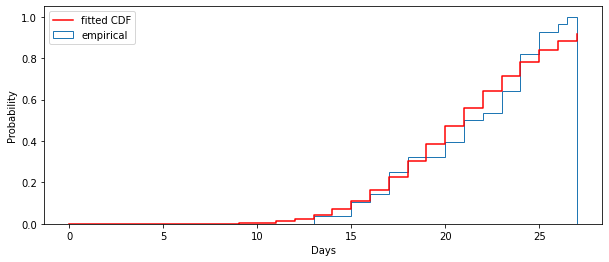

In [27]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

ax.hist(dry_day_dd[101], density=True, cumulative=True, histtype ='step',bins=28, label='empirical', align='mid')
ax.step(x, pos, where='post', color= 'red', label='fitted CDF')

plt.xlabel('Days')
plt.ylabel('Probability')
ax.legend()

#### 7. (5%) Please write down the topic(s) that you feel the most and the least useful in the first half of the semester.

In [28]:
# The most useful topic: Probability distribution and fitting
# The least useful topic: Descriptive Stats